In [1]:
import glob
import cv2
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

2023-11-18 18:50:12.695493: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 18:50:12.723866: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-18 18:50:12.723894: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-18 18:50:12.723911: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-18 18:50:12.733221: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-18 18:50:12.733600: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

Data Import

Load files from memory, separate between "original" and "mask", and make they are ordered the same

In [2]:
train_files = []
mask_files = glob.glob('lgg-mri-segmentation/kaggle_3m/*/*_mask*')

for i in mask_files:
    train_files.append(i.replace('_mask',''))

print("len images", len(train_files), "\n")
print("len masks", len(mask_files), "\n")

for i in range(3):
    print(train_files[i])
    print(mask_files[i])
    print()


len images 3929 

len masks 3929 

lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TW_19980228/TCGA_DU_A5TW_19980228_2.tif
lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TW_19980228/TCGA_DU_A5TW_19980228_2_mask.tif

lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TW_19980228/TCGA_DU_A5TW_19980228_5.tif
lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TW_19980228/TCGA_DU_A5TW_19980228_5_mask.tif

lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TW_19980228/TCGA_DU_A5TW_19980228_14.tif
lgg-mri-segmentation/kaggle_3m/TCGA_DU_A5TW_19980228/TCGA_DU_A5TW_19980228_14_mask.tif



Data Augmentation

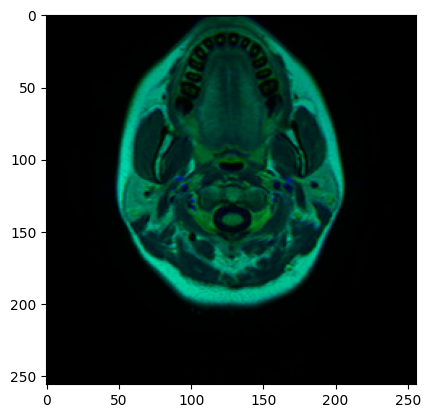

In [3]:
img = cv2.imread(train_files[0])
plt.imshow(img)
plt.show()

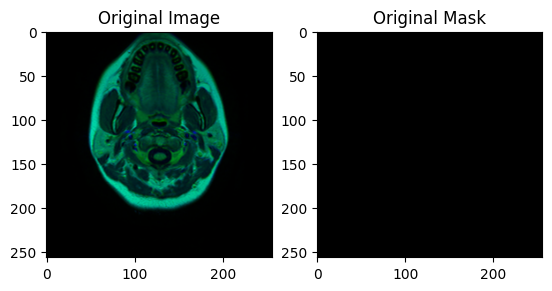

In [4]:
fig = plt.figure()

plt.subplot(1, 2, 1)
plt.title("Original Image")
img1 = cv2.imread(train_files[0])
plt.imshow(img1)

plt.subplot(1, 2, 2)
plt.title("Original Mask")
img2 = cv2.imread(mask_files[0])
plt.imshow(img2)

plt.show()

In [5]:
print("max", img1.max())
print("shape", img1.shape)

max 223
shape (256, 256, 3)


In [18]:
for i in range(10):
    file = mask_files[i]
    img = cv2.imread(file)
    print(np.max(img)//255)

0
0
0
1
1
0
1
1
0
0
